# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [3]:
df = pd.read_csv('placement .csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# See Distribution

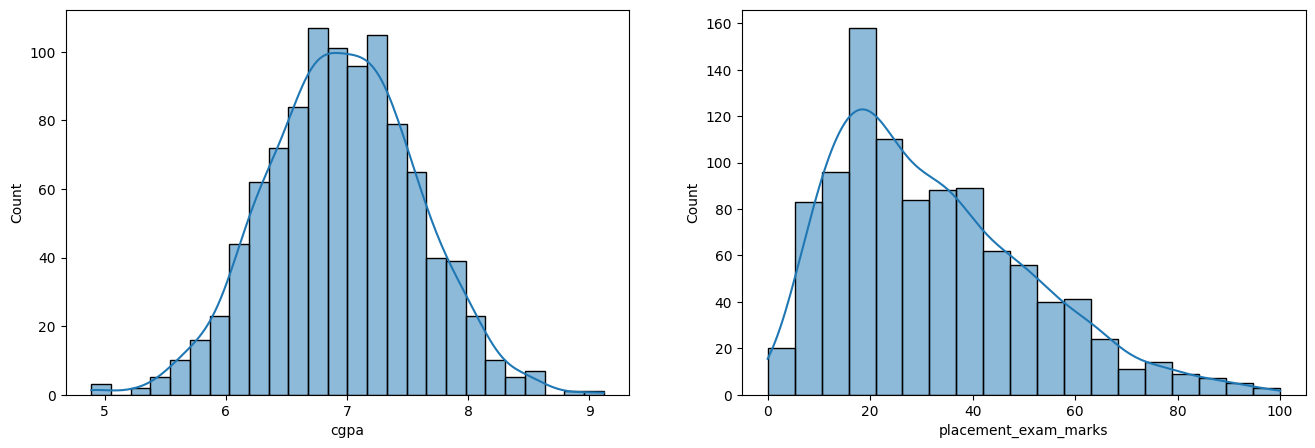

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

## Here `df['placement_exam_marks']` has skewed data so here we can apply `IQR method`

<Axes: ylabel='placement_exam_marks'>

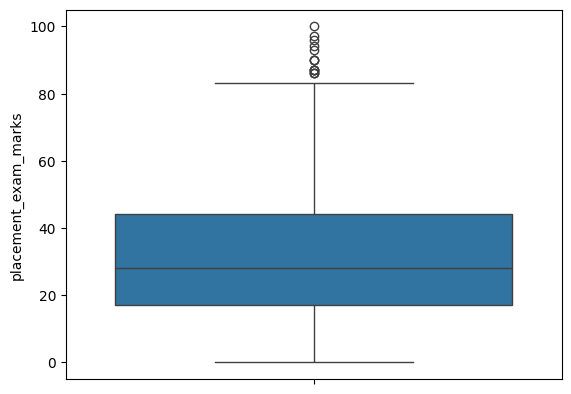

In [13]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
df['placement_exam_marks'].skew()

0.8356419499466834

# Calculate IQR
```
1. Q1 = 25%
2. Q3 = 75%
3. IQR = Q3-Q1
4. maximum_Value = Q3 + (1.5 * IQR)
5. minimum_value = Q1 - (1.5*IQR)
```

In [10]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [12]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
IQR = Q3 - Q1
maximum_value = Q3 + (1.5 * IQR)
minimum_value = Q1 - (1.5 * IQR)

In [14]:
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')
print(f'maximum_value = {maximum_value}')
print(f'minimum_value = {minimum_value}')

Q1 = 17.0
Q3 = 44.0
IQR = 27.0
maximum_value = 84.5
minimum_value = -23.5


# Finding Outlier

In [15]:
df[df['placement_exam_marks'] > maximum_value]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df['placement_exam_marks'] < minimum_value]

,cgpa,placement_exam_marks,placed


# Trimmed

In [17]:
new_df = df[df['placement_exam_marks'] < maximum_value]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [18]:
new_df.shape

(985, 3)

## See Distribution

<ipython-input-19-d0a2ab2fcc4d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-19-d0a2ab2fcc4d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


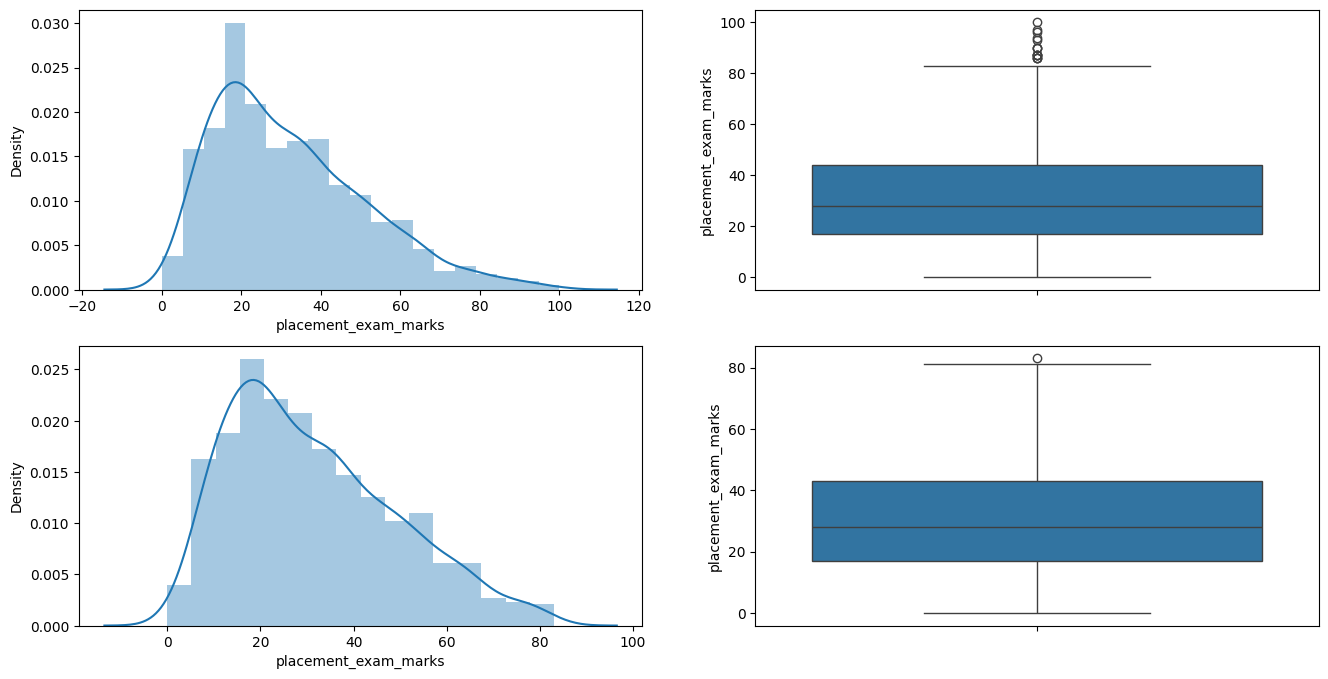

In [19]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [20]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


In [21]:
new_df['placement_exam_marks'].skew()

0.6549925627115251

# Capping

In [23]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > maximum_value,
    maximum_value,
    np.where(
        new_df_cap['placement_exam_marks'] < minimum_value,
        minimum_value,
        new_df_cap['placement_exam_marks']
    )
)

In [ ]:
# np.where(condtion,true,false)

In [25]:
new_df_cap.shape

(1000, 3)

# See Distribution

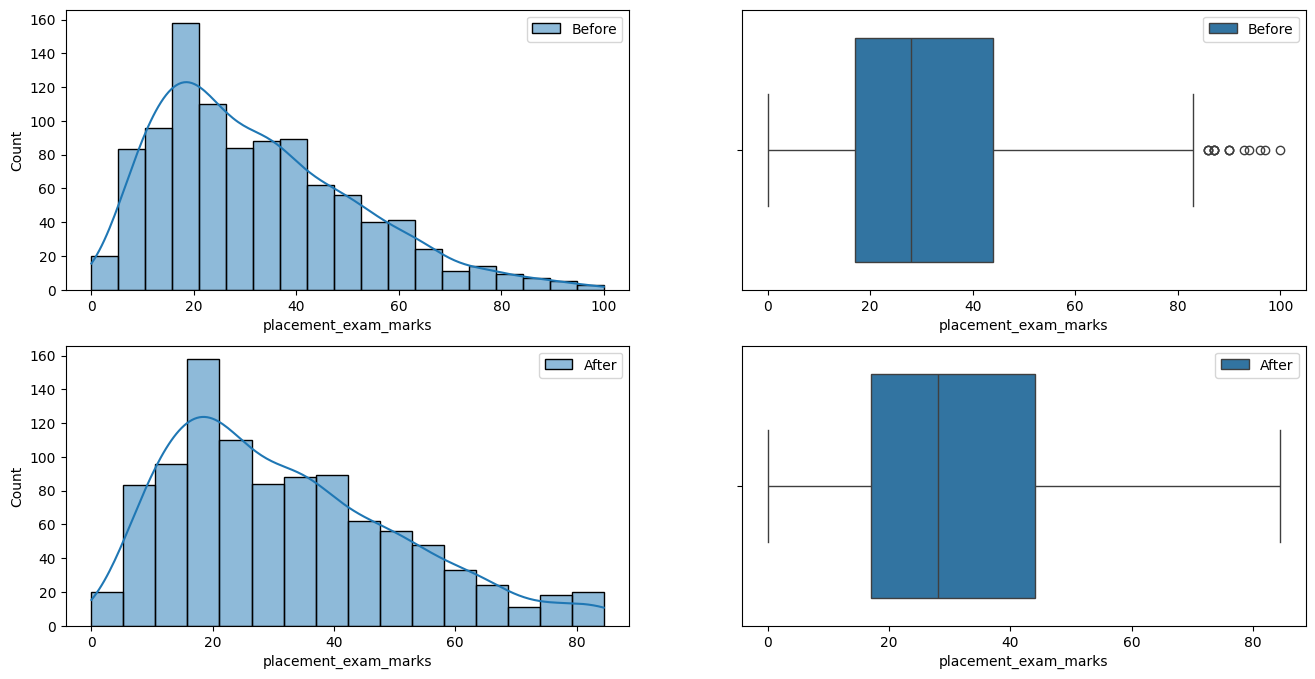

In [30]:
# Comparing

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], kde=True, label='Before')
plt.legend()  # Legend for subplot 1

plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'], label='Before')

plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True, label='After')
plt.legend()  # Legend for subplot 3

plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['placement_exam_marks'], label='After')

plt.show()